# Plume Dispersion Activity

## Introduction

I created this activity to help you explore some of the processes that are important for plume dispersion. The activity is built as a **Jupyter notebook**. In short, this allows you to execute computer code from within your webbrowser. We are using Python code for this. Don't worry if you are not familiar with Python as this won't require any coding on your part. I have already done this. 


## Objectives 

During this activity, you will explore two main objectives:

1. The effect of turbulence on plume dispersion. 
2. Behavior of the Gaussian Plume model.

But before we do this, lets get a tiny bit familiar with **Jupyter notebooks**


## Getting Started 
Jupyter notebooks are made up of cells (or boxes) that can contain text or computer code. If you double click on a cell, you can edit these like a Word document. You can also make

Clicking "Shift + Enter" (on a PC) or the Run button at the top center will allow you to leave a cell and to execute any calculations it contains.


![](https://problemsolvingwithpython.com/02-Jupyter-Notebooks/images/run_cell.png)

Why dont you try this now. Click on the cell below (1+2) and see what happens if you run this cell (Click the Run button now).

In [1]:
1+2

3

As you can see, this worked like a calculator. The result of the calculation is displayed in as an output. 

Now run the next cell:

In [2]:
# This is a comment. It is just text within a calculation box. Nothing will happen!

Phyton will ignore anything that is followed on the same line after the `#`

Now we can get started. 

**Run the next cell. We need these things in order to run our demonstration.**

You may have noticed that the active cell keeps moving down, so if you want to run a cell twice you need click on it again. You can also use the arrow keys on your keyboard to move up one cell.


In [1]:
import random
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from scipy.stats import norm

import model  # This is where the magic happens. I have written code that will do some calculations and will produce plots. 
              # If you are familar with Python feel free to explore this file, 
              # which is in the same directory as the notebook.

%matplotlib inline
%config InlineBackend.figure_format = 'retina'


### 1. Turbulence
The atmosphere is turbulent.
Turbulent motion involves random-ness, which means that we cannot predict the exact movement of any particle that is released from a source. At the same time, we can use statistics to describe the mean behavior of a turbulent plume. 

Let's explore this using what we call a random walk. We assume that we release a particle from a stack with a certain heigh.
We have a mean wind speed (*_u_*) that carries the particle. In addition to traveling with the mean, there is also dispersion that adds some random motion to our particle. 

This dispersion in the horizontal can be expressed through the `sigma_v` ($\sigma_v$) parameter and the dispersion in the vertical can be expressed through the `sigma_w` ($\sigma_w$) parameter. 

The next cell will calculate 1000 random trajectories using the parameters below for `u, sigma_v, sigma_w`. This might take a few moments. Once the cell is done calculating you can continue below. 

In [5]:
u= 2           # This is our mean wind speed in the horizontal (m/s) [Original value: 2]

v_sigma = 1    # This is the lateral dispersion parameter (m/s) [Original value: 1]
w_sigma = 0.25 # This is the vertical dispersion (m/s) [Original value: 0.25]

start_x = 0    # This is the starting coordinate in x-direction in m [Original Value: 0]
start_y = 0    # This is the starting coordinate in y-direction (crosswind) in m [Original Value: 0]
start_z = 100  # This is the starting coordinate in z-direction (vertical) in m [Original Value: 100]

# <<< Do not modify 
n_trajectories = 1000  # This is the total number of trajectories 
x,y,z =model.calculate_trajectories(start_y,start_z,u,v_sigma,w_sigma,n_trajectories)
# >>> Do not modify 

You can now start plotting your trajectories. Executing the cell below will plot `n` trajectories. Run the cell below several times while focusing on the random walks. 

**What do you observe about the trajectories from run to run?** 

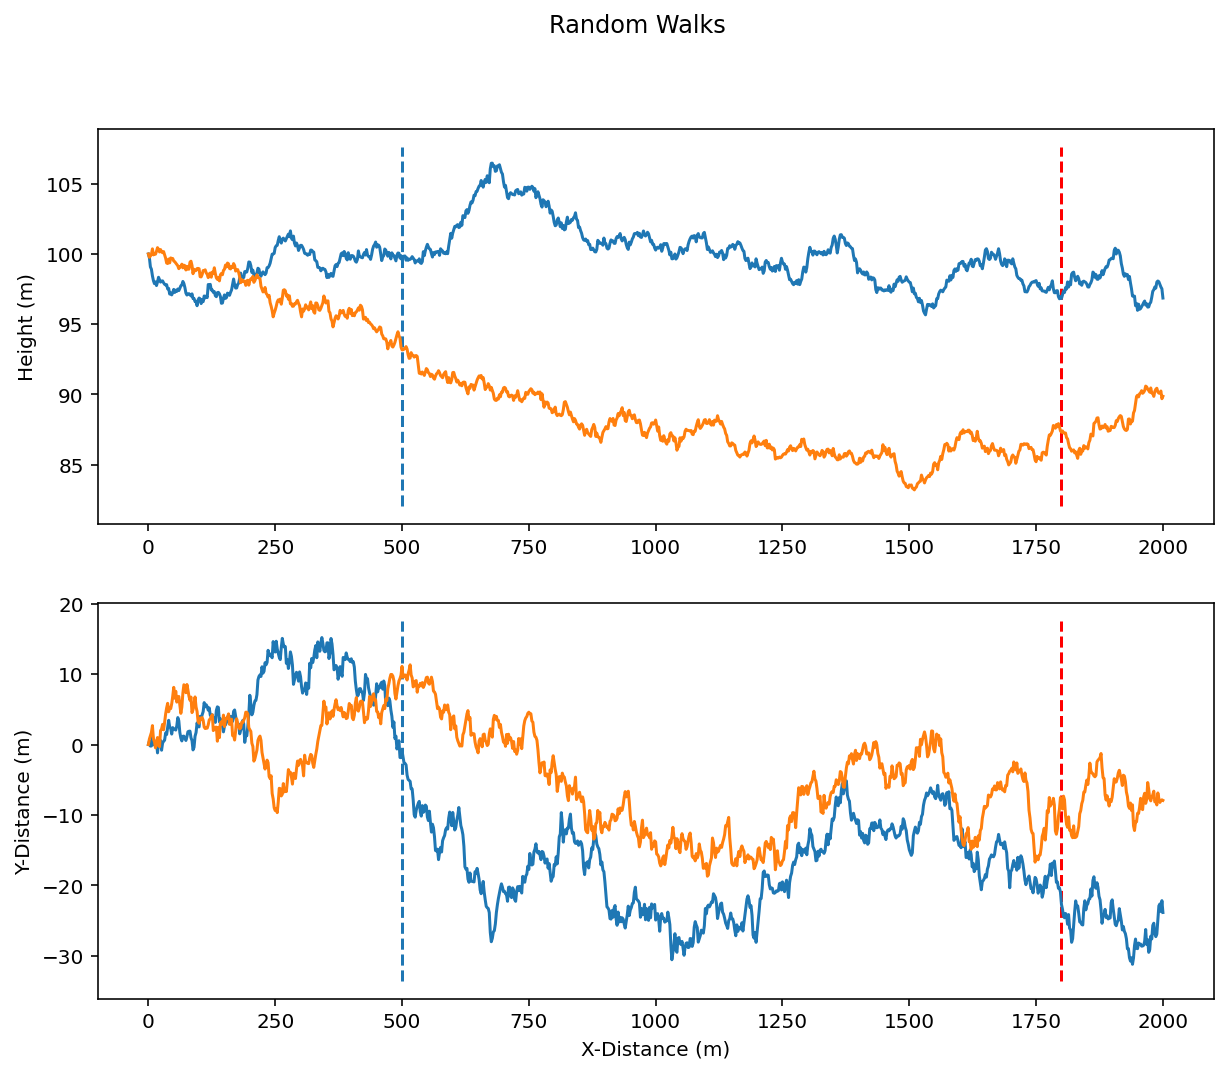

In [12]:
n = 2 # This is the number of trajectories that will be plotted

# <<< Do not modify 
model.plot_trajectory(x,y,z,n,n_trajectories,False)
# >>> Do not modify 

Let's start thinking about the distribution of the random walks. To do so, execute the code below, while 
starting to increase the number of trajectories `n`. You might want to try n values of 10, 50, 100, 500, 1000. 

In addition to the random walks, this code will also produce also  a histogram of the y and z locations for the particles released at the dashed lines and compare them to a bell curve. 


**What do you observe about the behavior of trajectories?**

This is now a good time to look at the second part of the plot, which shows the distribution of particles at the dotted cross sections and compares this to a normal (or Gaussian Distribution).

**What do you observe about the shape of the distribution in the second plot?**

**Does it start to look like a bell curve. If so, how many particles do you need?**

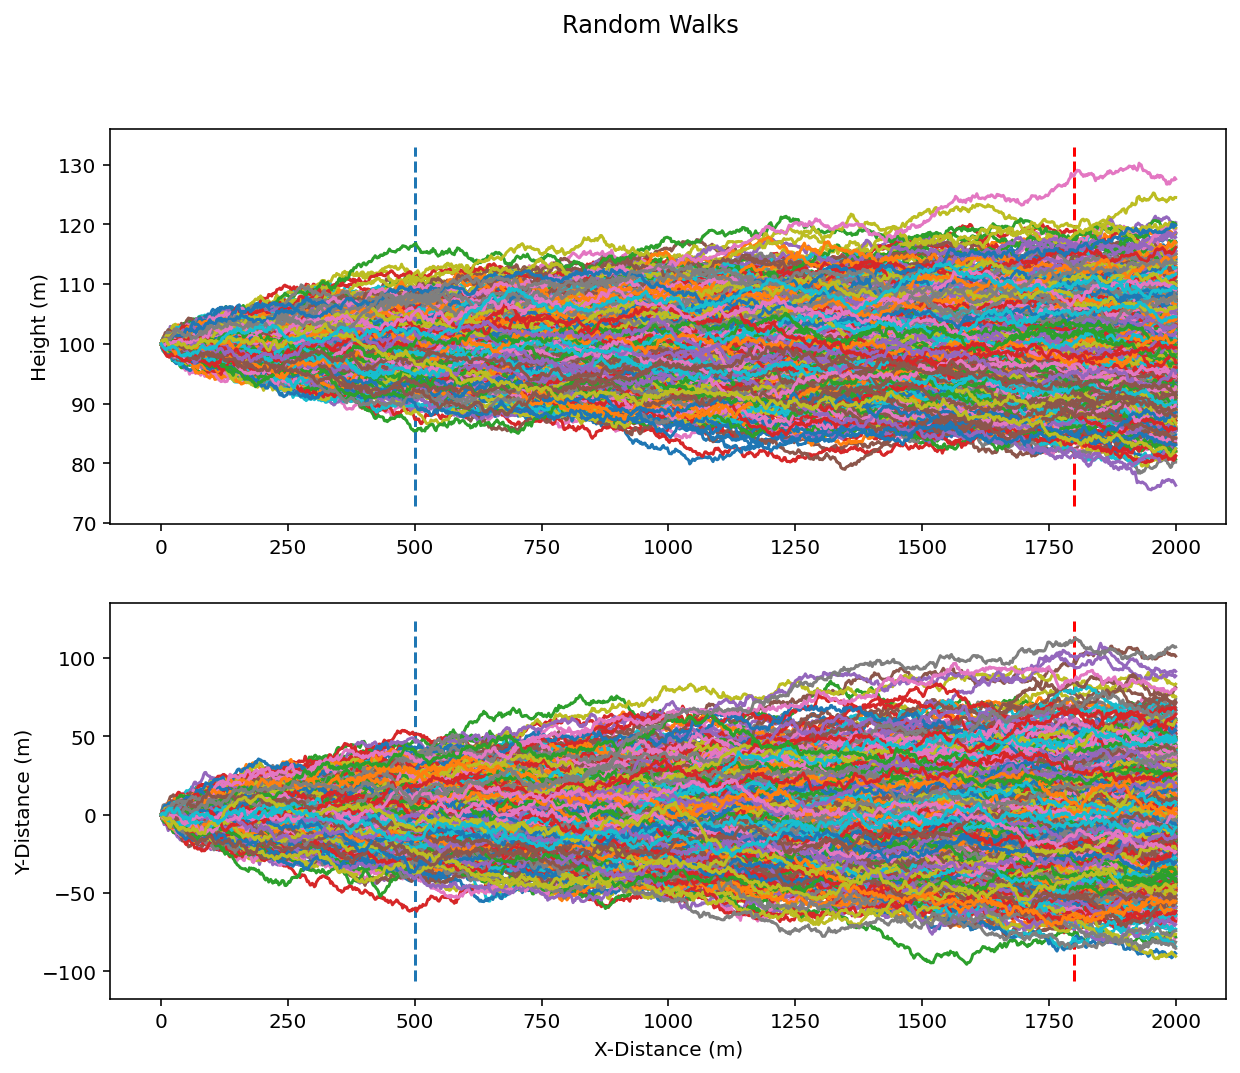

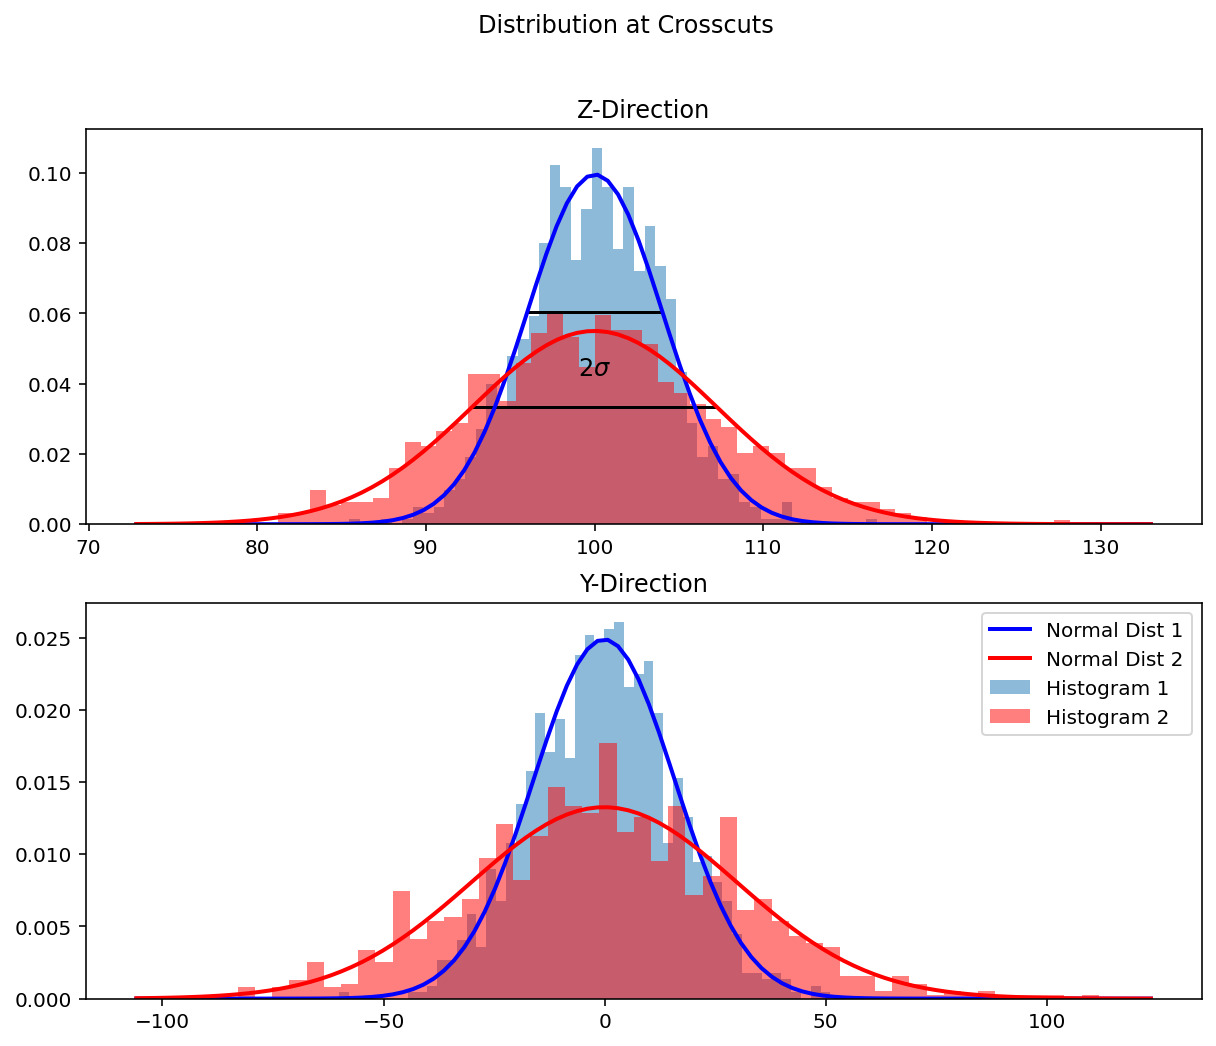

In [14]:
n = 1000 # (maximum = 1000) This is the number of trajectories that will be plotted. This will take a bit longer for large numbers 

# <<< Do not modify 
plot_histogram = True   # This will create a second histogram plot. 
model.plot_trajectory(x,y,z,n,n_trajectories, plot_histogram)
# >>> Do not modify 


You probably noticed, that as you increase the number of particles, their distbution starts to look more and more like a bell curve, which can be described mathematically using its mean (which is the centerline of the plume and the standard deviation around the mean in the lateral $\sigma_v$ and vertical $\sigma_w$. The larger the $\sigma$ values the more spread out the plume becomes. 

**Hence, we can use a Gaussian Plume Model to estimate the spread of the plume.**

### The Gaussian Plume Model

We can assume that pollution released from a stack spreads forming a Gaussian Plume, where the plume spreads around a centerline, which points in the direction of the main wind. 


![](https://upload.wikimedia.org/wikipedia/commons/1/10/Gaussian_Plume.png)

The mathematical equation for this is: 
![](https://github.com/TobGerken/ISAT321/blob/main/Code/GaussianPlume.PNG?raw=true)

The further downwind we go, the more the plume spreads, which determines the concentrations of pollutants as a function of release rate`Q`, effective release height `H`, wind speed `u`. The spread of the plume in lateral and vertical direction is controlled through the dispersion parameters ($\sigma_v$, $\sigma_w$), which describe the standard devation of the Gaussian (Bell) curve. 

Because the plume spread increases the further we go downwind, $\sigma_v$ and $\sigma_w$ depend on the downwind distance. 

They also depend on atmospheric stability, which can be expressed through the stability classes `A-E` from *unstable to stable* conditions.

I wrote a simple Gaussian Plume Model that you can use to visualze the effects of release height and atmospheric stability on plume spread. 

Run the next cell. 

In [2]:
# This should only be run once and might take a few moments to run
# <<< Do not modify 
PlumeParam, NewPlume = model.init_GaussianPlume()
# >>> Do not modify.

You can now run the next cell, which will produce a few plots that show the spread of the plume. Run this once and then try to understand what the plots are visualizing. 
The contourplots are cross sections trough the plume that show the concentrations of the pollutant at a certain location. You can control the location of the cross-sections, with the `X_CrossS, Y_CrossS, Z_CrossS` parameters below. 

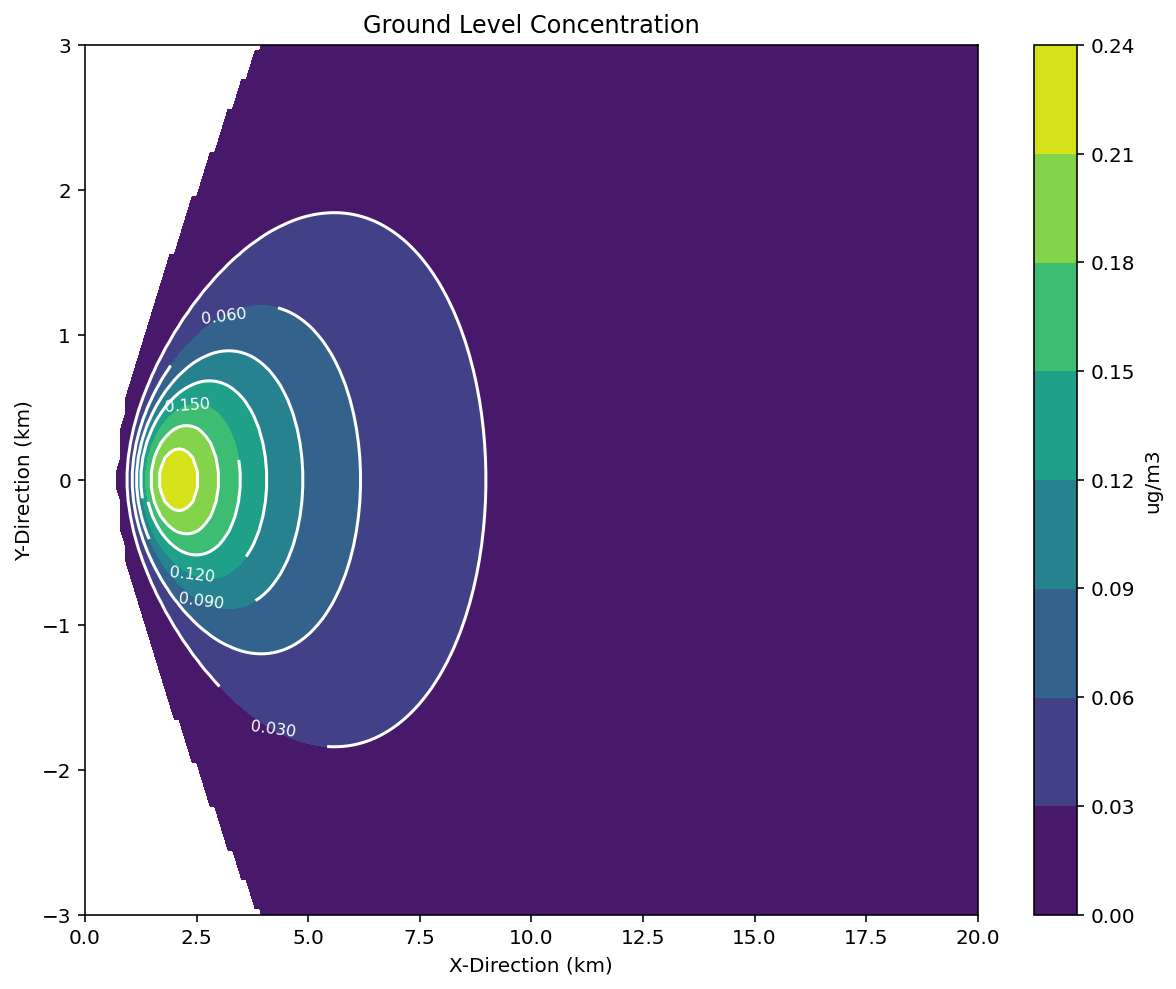

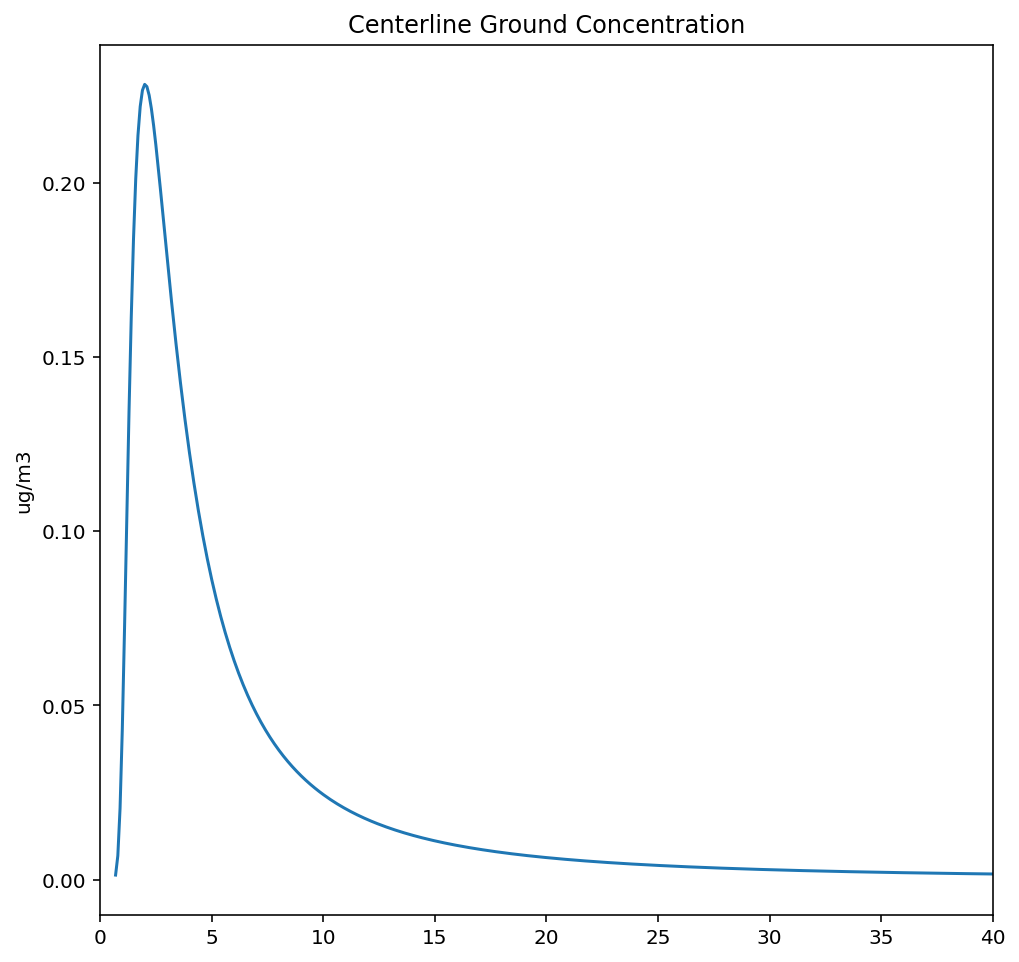

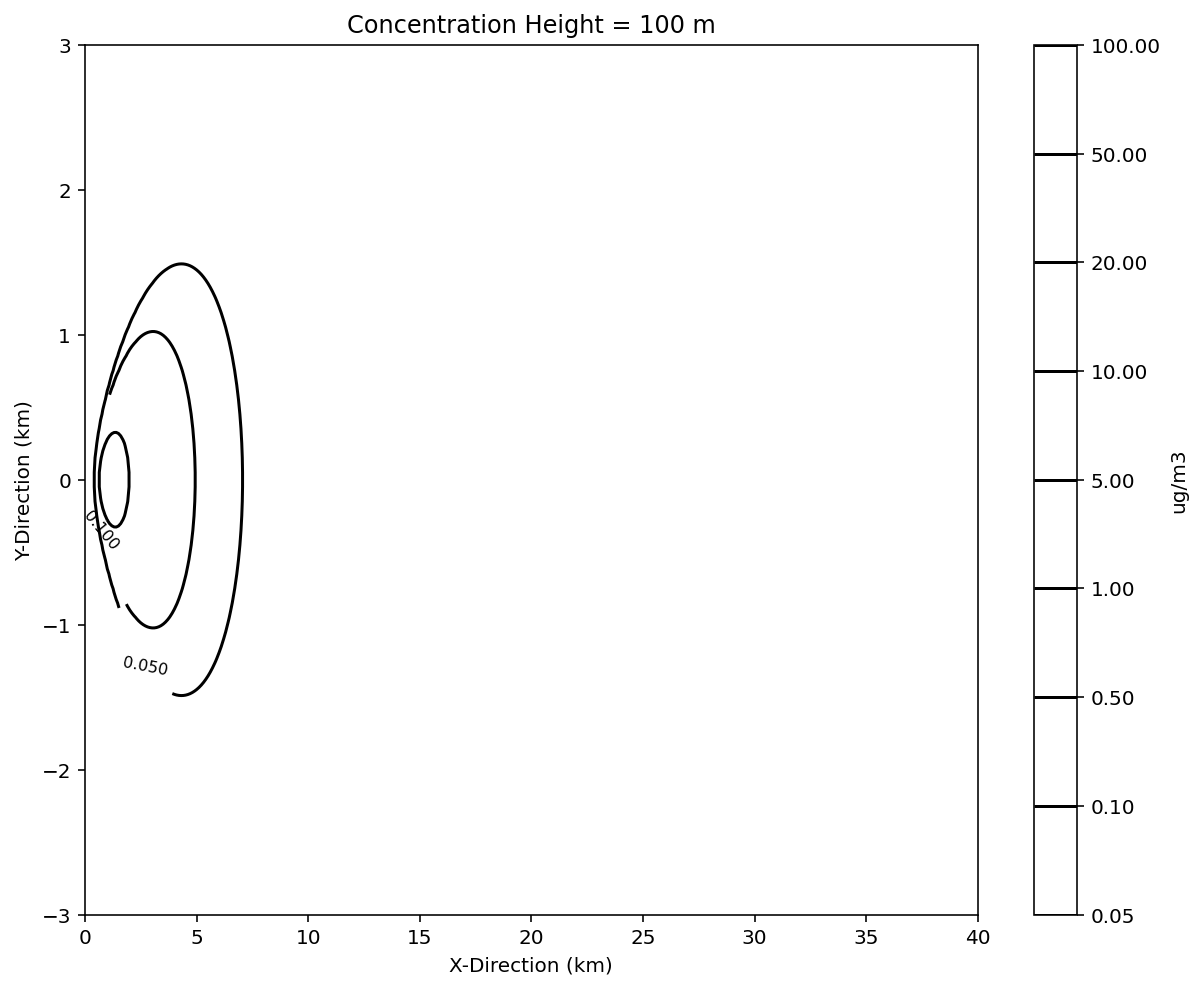

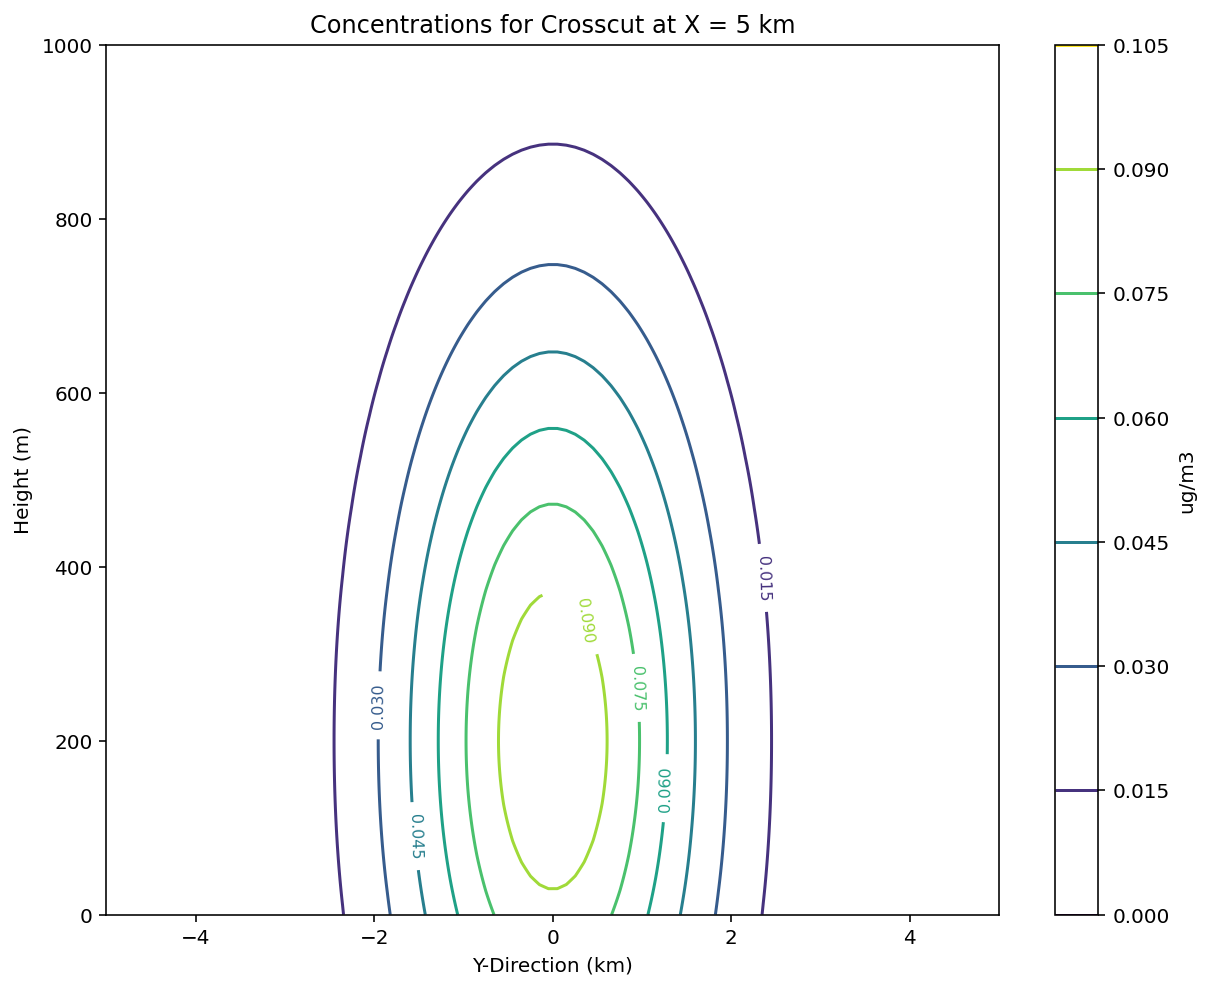

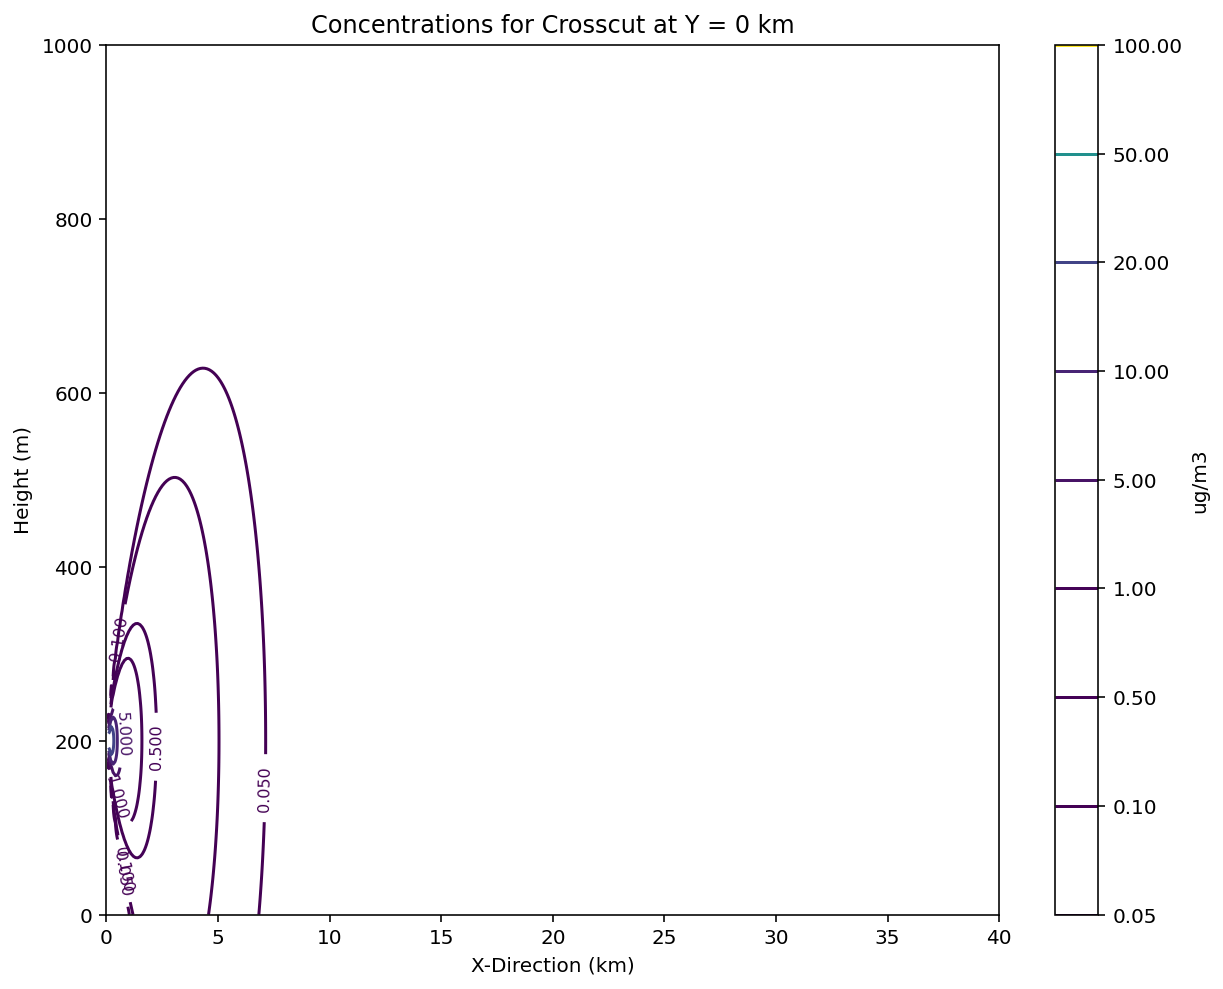

In [3]:
Q = 1000  # Release rate (mg/s) [Original Value : 1000 ]
H = 200   # The Effective Stack Height  [Original Value : 200 ]

u=2       # Windspeed in m/s [Original Value : u=2 ]

# Select the Stability Class Here
# Options are:
# A (very unstable)
# B (moderately unstable)
# C (slightly unstable)
# D (neutral
# E (slightly stable)
# E (very stable)
# Values are taken from: https://www.eng.uwo.ca/people/esavory/Gaussian%20plumes.pdf
stability_class = 'C'  
    
    
X_CrossS = 5    # Location of crossection in X in km  (5 was inital value)
Y_CrossS = 0    # Location of crossection in Y in km  (0 was inital value, this is the centerline)
Z_CrossS = 100  # Height of crossection in Z in m  (100 was inital value, this is inital stack height) 

# <<< Do not modify 
C =model.calc_GaussianPlume(Q,H,u,stability_class,PlumeParam)
NewPlume=model.plot_GaussianPlume(C, X_CrossS, Y_CrossS, Z_CrossS, PlumeParam)
# >>> Do not modify.


You are now ready to experiment. Use the cell above to try different release heights, and stabilities. While you do so, try to develop an understandhing on how your parameter choices affect the spread of the plume and the concentrations of the pollutant at the surface. 

**What relationships between surface concentration and stability and or release height do you see**
